# Practice Project 2

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [53]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [19]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [20]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
data.shape

(158, 12)

In [21]:
data.drop(['Country', 'Region', 'Happiness Rank'],axis=1,inplace=True)
data.head()          

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
data.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [24]:
data.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [25]:
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<function matplotlib.pyplot.show(close=None, block=None)>

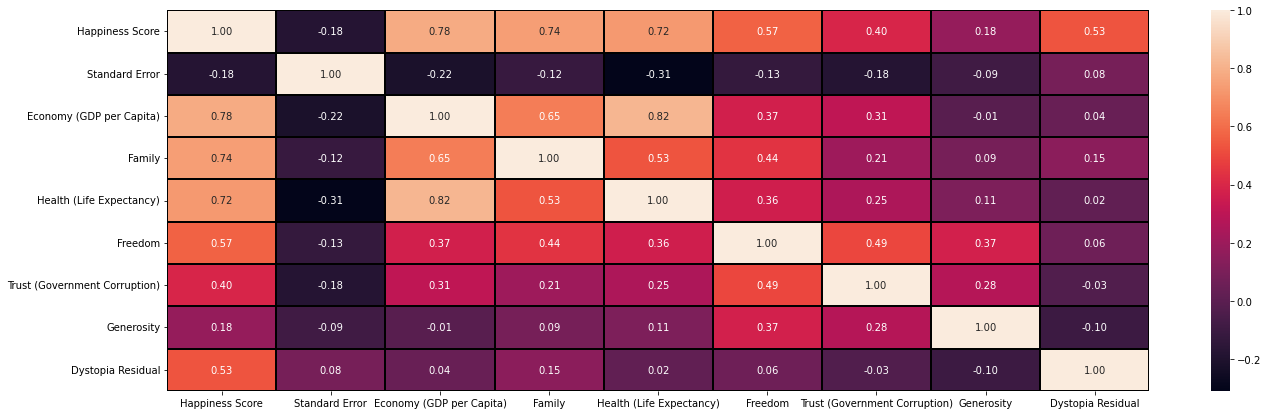

In [27]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='black', fmt='0.2f')
plt.show

In [30]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [28]:
y=data['Happiness Score']
x=data.drop('Happiness Score',axis=1)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [64]:
for i in range(0,100):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random_state{i}, the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"at random_state{i}, the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

at random_state0, the training accuracy is :-0.9999999515828992
at random_state0, the testing accuracy is :-0.9999998979177837


at random_state1, the training accuracy is :-0.9999999441411482
at random_state1, the testing accuracy is :-0.9999999270958111


at random_state2, the training accuracy is :-0.9999999404843422
at random_state2, the testing accuracy is :-0.9999999372398809


at random_state3, the training accuracy is :-0.9999999392743703
at random_state3, the testing accuracy is :-0.9999999424354707


at random_state4, the training accuracy is :-0.9999999322138544
at random_state4, the testing accuracy is :-0.9999999522216209


at random_state5, the training accuracy is :-0.9999999460499149
at random_state5, the testing accuracy is :-0.9999999164625938


at random_state6, the training accuracy is :-0.9999999421813434
at random_state6, the testing accuracy is :-0.9999999345085112


at random_state7, the training accuracy is :-0.9999999482316859
at random_state7, the testing acc

In [70]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=99)

In [71]:
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
pred_test==lr.predict(x_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [73]:
print(r2_score(y_test,pred_test))

0.9999999278073477


In [74]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy= r2_score(y_test,pred_test)

In [77]:
from sklearn.model_selection import cross_val_score

In [80]:
for j in (2,10):
    cv_score=cross_val_score(lr, x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for train is {train_accuracy} and accuracy score for test is {test_accuracy}")
    print('\n')

 At cross fold 2 the cv score is 0.9999997643283955 and accuracy score for train is 0.9999999427775715 and accuracy score for test is 0.9999999278073477


 At cross fold 10 the cv score is 0.9999915038307658 and accuracy score for train is 0.9999999427775715 and accuracy score for test is 0.9999999278073477




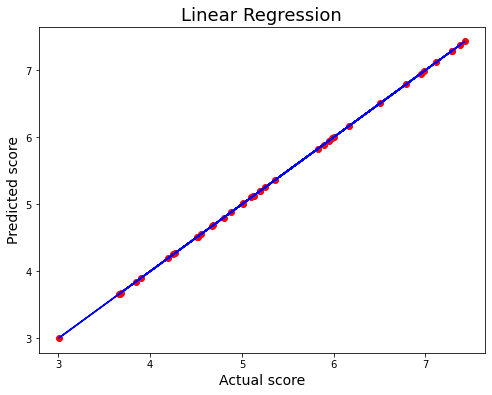

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test, y_test, color= 'b')
plt.xlabel('Actual score', fontsize=14)
plt.ylabel('Predicted score', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [91]:
parameters={'alpha':[.0001,.001, .01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [92]:
ls=Lasso(alpha=.0001, random_state=0)
ls.fit(x_train, y_train)
ls_score_training=ls.score(x_train, y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

99.99990662596971

In [93]:
pred_ls=ls.predict(x_test)

In [94]:
lss=r2_score(y_test,pred_ls)
lss*100

99.99989104199243

In [95]:
cv_score= cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

99.99410137274435

In [96]:
from sklearn.ensemble import RandomForestRegressor
parameters= {'criterion':["mse","mae"],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'auto'}


In [104]:
rf=RandomForestRegressor(criterion="mse", max_features= "auto")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2_score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print ("Cross Val Score:" ,rfc*100)

r2_score: 89.17838174606587
Cross Val Score: -431.48083979669013


In [105]:
import pickle
filename="churn.pkl"
pickle.dump(rf, open(filename,'wb'))


In [107]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.17838174606587


In [108]:
conclussion=pd.DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]],index=["Predicted", "Original"])
conclussion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,5.82002,5.42095,3.79474,4.62509,5.16589,7.28601,5.50178,4.7112,7.0709,5.04175,...,4.63525,3.95074,7.07143,5.50208,6.01597,5.88807,5.32578,6.41983,6.52426,4.85744
Original,5.82002,5.42095,3.79474,4.62509,5.16589,7.28601,5.50178,4.7112,7.0709,5.04175,...,4.63525,3.95074,7.07143,5.50208,6.01597,5.88807,5.32578,6.41983,6.52426,4.85744
